## INSY669: GROUP PROJECT : Fake Book Review Detection

### A machine learning approach to improve Goodreads' credibility

By Karen Bou Daou (260957944), Juliana Hubacova (261199618), Hamza Javed (260768221), Axel Peronnet (261226471)

### Project Overview  
This project aims to analyze and classify **fake vs real reviews** using Natural Language Processing (NLP) techniques.  
We explore various text preprocessing methods, sentiment analysis, feature extraction techniques, and machine learning models to build an effective classification system. Key Steps:

1. **Data Preprocessing**: Cleaning and preparing the dataset for analysis.
2. **Sentiment Analysis**: Understanding the emotional tone of reviews.
3. **Feature Engineering**: Applying TF-IDF and Bag-of-Words (BoW) techniques to extract meaningful features.
4. **Machine Learning Models**: Training classification models to distinguish between fake and real reviews.
5. **Evaluation & Insights**: Analyzing model performance and key takeaways.


### Exploratory Data Analysis (EDA)
Before building our classification models, we conducted Exploratory Data Analysis (EDA) to gain insights into the dataset. This helps us understand the data distribution, detect missing values, and identify potential patterns in fake (CG) vs. real (OR) reviews. Objective is to answer to the following questions:
- Determine if fake reviews tend to have extreme ratings (either very high or very low) compared to real ones.
- Check if the dataset is imbalanced.
- Do fake reviews (CG) use generic or repetitive words, while real reviews (OR) might have more diverse vocabulary?
- Do fake reviews (CG) have a significantly different average rating than real ones? (Rating could be a useful feature for classification.)
- Do fake reviews have fewer unique words, indicating a lack of diversity in word usage? If fake reviews (CG) have significantly fewer unique words, it suggests they are more template-based or repetitive, which can help in classification.


Training Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370 entries, 0 to 4369
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  4370 non-null   object
 1   rating    4370 non-null   int64 
 2   label     4370 non-null   object
 3   text_     4370 non-null   object
dtypes: int64(1), object(3)
memory usage: 136.7+ KB
None
            rating
count  4370.000000
mean      4.254691
std       1.082067
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000

Missing Values in Training Dataset:
          Missing Values  Percentage
category               0         0.0
rating                 0         0.0
label                  0         0.0
text_                  0         0.0


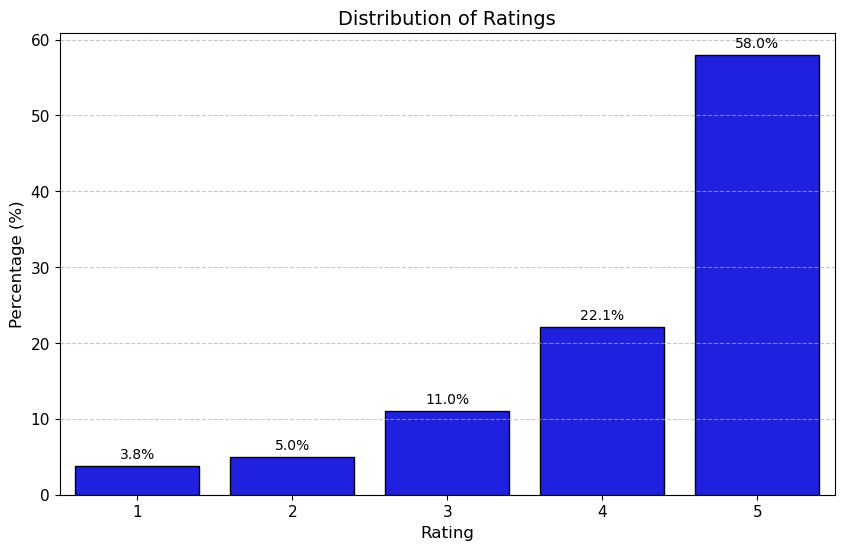

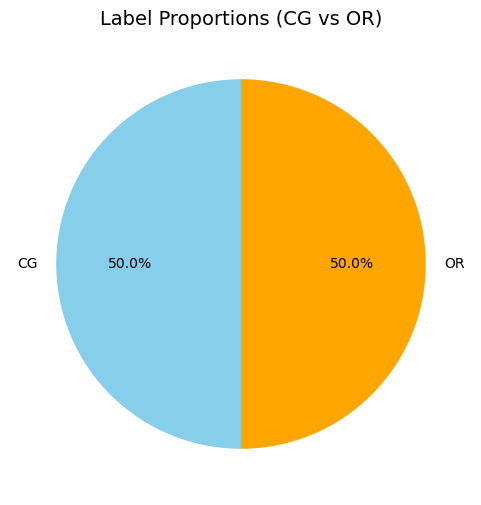

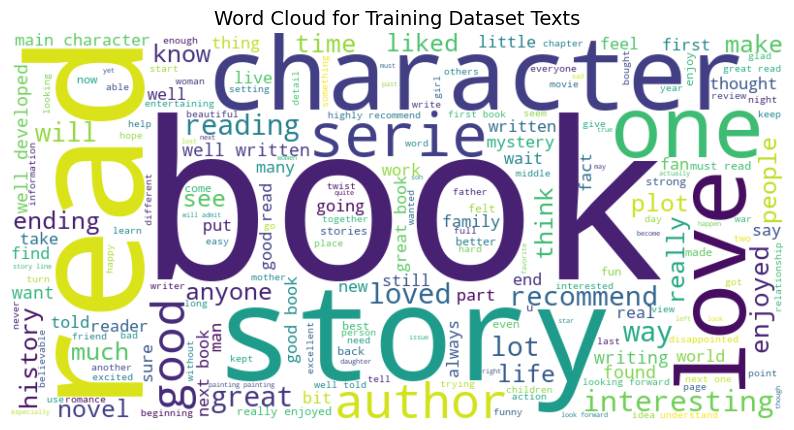


Average Rating by Label:
label
CG    4.220137
OR    4.289245
Name: rating, dtype: float64


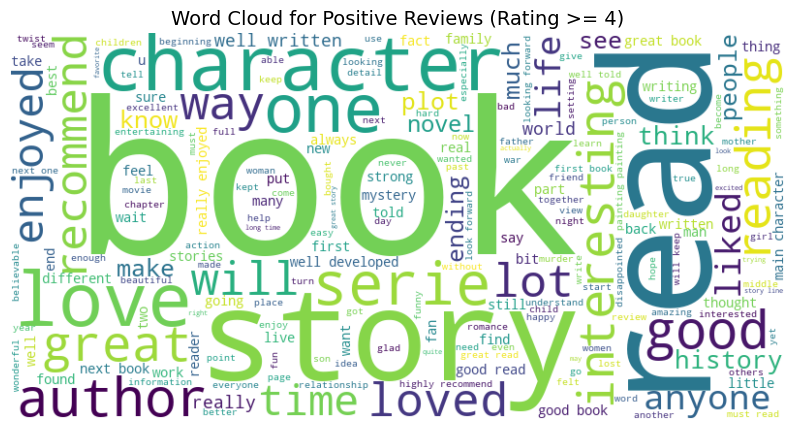

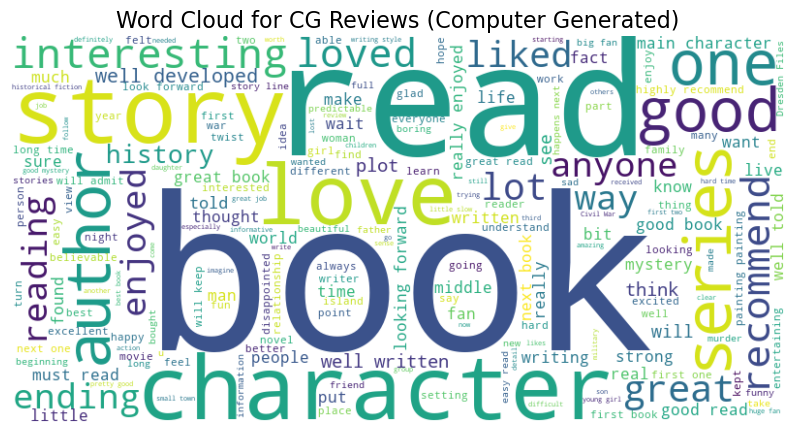

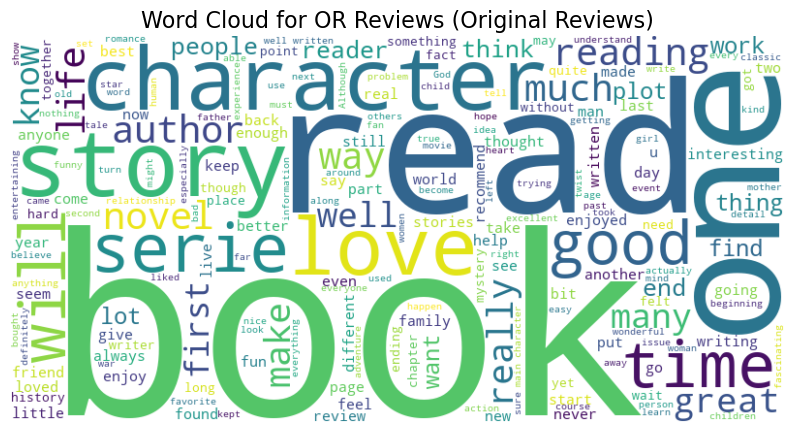

Average number of unique words in CG (Computer Generated) reviews: 41.15
Average number of unique words in OR (Original Reviews): 63.97


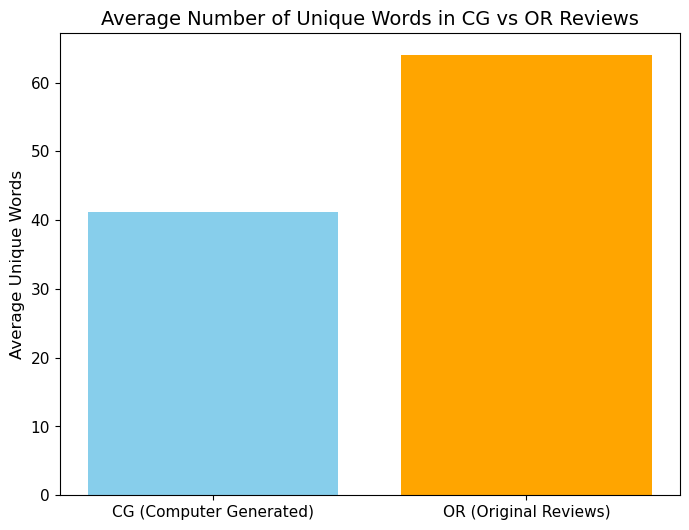

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Loading the dataset
training_data = pd.read_csv("C:/Users/Juliana Hubacova/OneDrive - McGill University/Desktop/fake_real_reviews.csv")

# Function to display missing values
def missing_values_table(df):
    missing_values = df.isnull().sum()
    missing_percentage = 100 * df.isnull().sum() / len(df)
    return pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Data Overview
print("\nTraining Dataset Overview:")
print(training_data.info())
print(training_data.describe())

# Missing values
print("\nMissing Values in Training Dataset:")
print(missing_values_table(training_data))

# Distribution of Ratings (as Percentage)
rating_percentages = training_data['rating'].value_counts(normalize=True).sort_index() * 100

# Bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=rating_percentages.index, 
    y=rating_percentages.values, 
    color='blue', 
    edgecolor='black')
plt.title("Distribution of Ratings", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add percentage labels on top of each bar
for i, percentage in enumerate(rating_percentages.values):
    ax.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=10)
plt.show()

# Label Proportions (CG vs OR)
label_counts = training_data['label'].value_counts()
plt.figure(figsize=(6, 6))
label_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title("Label Proportions (CG vs OR)", fontsize=14)
plt.ylabel("")
plt.show()

# Word Cloud for Text Column in Training Dataset
text_training = " ".join(text for text in training_data['text_'].dropna())
wordcloud_training = WordCloud(width=800, height=400, background_color='white').generate(text_training)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_training, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Training Dataset Texts", fontsize=14)
plt.show()

# ------------------- Additional Insights -------------------

# Average Rating by Label
avg_rating_label = training_data.groupby('label')['rating'].mean()
print("\nAverage Rating by Label:")
print(avg_rating_label)

# Top Words in Positive Reviews (Rating >= 4)
positive_reviews = training_data[training_data['rating'] >= 4]['text_']
positive_text = " ".join(review for review in positive_reviews.dropna())
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Reviews (Rating >= 4)", fontsize=14)
plt.show()

# Filter CG and OR reviews
cg_reviews = " ".join(training_data[training_data['label'] == 'CG']['text_'].dropna())
or_reviews = " ".join(training_data[training_data['label'] == 'OR']['text_'].dropna())

# Function to generate and display a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Generate and display word clouds for CG and OR reviews
generate_word_cloud(cg_reviews, "Word Cloud for CG Reviews (Computer Generated)")
generate_word_cloud(or_reviews, "Word Cloud for OR Reviews (Original Reviews)")

# Add a column for unique word counts
def unique_word_count(text):
    if isinstance(text, str):  
        words = text.split()
        return len(set(words))  
    return 0

training_data['unique_word_count'] = training_data['text_'].apply(unique_word_count)

# Calculate average unique word count for CG and OR reviews
cg_avg_unique_words = training_data[training_data['label'] == 'CG']['unique_word_count'].mean()
or_avg_unique_words = training_data[training_data['label'] == 'OR']['unique_word_count'].mean()

# Print the results
print(f"Average number of unique words in CG (Computer Generated) reviews: {cg_avg_unique_words:.2f}")
print(f"Average number of unique words in OR (Original Reviews): {or_avg_unique_words:.2f}")

# Compare using a bar chart
labels = ['CG (Computer Generated)', 'OR (Original Reviews)']
values = [cg_avg_unique_words, or_avg_unique_words]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['skyblue', 'orange'])
plt.title("Average Number of Unique Words in CG vs OR Reviews", fontsize=14)
plt.ylabel("Average Unique Words", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()


### Data Preprocessing  
The first step in this project is to **preprocess the training dataset** (`fake_real_reviews.csv`).  
Steps include:
- Filtering for **only book reviews** (removing other categories).
- Applying **text preprocessing**:
  - Removing **URLs, HTML tags, numbers, and punctuation**.
  - **Lowercasing** text for uniformity.
  - **Tokenization & stopword removal**.
  - **Lemmatization** to standardize words.
- Saving the cleaned dataset for further analysis.

In [3]:
# Importing necessary libraries
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Ensure necessary NLTK data is available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Loading the dataset
df = pd.read_csv("C:/Users/Juliana Hubacova/OneDrive - McGill University/Desktop/fake_real_reviews.csv")

# Filtering for books only
df = df[df['category'] == 'Books_5']

# Ensuring correct column name
if 'text_' in df.columns:
    text_column = 'text_'
elif 'text' in df.columns:
    text_column = 'text'
else:
    raise ValueError("No valid text column found in the dataset.")

# Function to preprocess text
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Add space after punctuation
    text = re.sub(r'([{}])'.format(re.escape(string.punctuation)), r'\1 ', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization for better word representation
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Remove short words (less than 2 characters)
    words = [word for word in words if len(word) > 2]
    cleaned_text = ' '.join(words)
    return cleaned_text

    
# Apply preprocessing to the text column
df['processed_text'] = df[text_column].apply(preprocess_text)

# Save the cleaned dataset
df.to_csv('C:/Users/Juliana Hubacova/OneDrive - McGill University/Desktop/preprocessed_reviews_for_training_fixed_new.csv', index=False)

print("Preprocessing complete. Cleaned data saved.")

[nltk_data] Downloading package stopwords to C:\Users\Juliana
[nltk_data]     Hubacova\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Juliana
[nltk_data]     Hubacova\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Juliana
[nltk_data]     Hubacova\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Preprocessing complete. Cleaned data saved.


## Sentiment Analysis
Our initial hypothesis is that fake reviews might have extreme sentiment scores, very positive or negative values.
We use the **VADER Sentiment Analyzer** from the `nltk` library to analyze the sentiment of each review.
- The model assigns a **sentiment score** to each text, indicating whether the sentiment is positive, neutral, or negative.
- The **compound score** is used as the final sentiment indicator.
- This helps us understand emotional tone in reviews.


In [5]:
# Importing necessary libraries
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
# Ensuring the VADER sentiment analyzer is downloaded
nltk.download('vader_lexicon')

# Loading the dataset
file_path = "C:/Users/Juliana Hubacova/OneDrive - McGill University/Desktop/preprocessed_reviews_for_training_fixed_new.csv"
df = pd.read_csv(file_path)

# Ensuring the correct text column exists
text_column = 'processed_text'
if text_column not in df.columns:
    raise ValueError(f"Column '{text_column}' not found in the dataset.")

# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # Compound score: overall sentiment

# Apply sentiment analysis to dataset
df['sentiment_score'] = df[text_column].apply(get_sentiment)

# Save the sentiment results (optional)
sentiment_file = "C:/Users/Juliana Hubacova/OneDrive - McGill University/Desktop/sentiment_analysis_reviews.csv"
df.to_csv(sentiment_file, index=False)

# Display the first few rows with sentiment scores
print(df[['processed_text', 'sentiment_score']].head())

print(f"Sentiment analysis complete. Saved as '{sentiment_file}'.")

[nltk_data] Downloading package vader_lexicon to C:\Users\Juliana
[nltk_data]     Hubacova\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                      processed_text  sentiment_score
0                         hooked writer reading work           0.0000
1  good book exactly described character well dev...           0.6124
2  fitting ultimate survivor epidemic one save pe...           0.6908
3  absolutely loved every word book kindle also m...           0.6361
4              loved real believable engrossing read           0.5994
Sentiment analysis complete. Saved as 'C:/Users/Juliana Hubacova/OneDrive - McGill University/Desktop/sentiment_analysis_reviews.csv'.


## Sentiment Score Visualization
We visualize the **distribution of sentiment scores** for real vs. fake reviews.
- This helps us identify trends in sentiment differences between the two classes.
- A histogram is used to compare the distributions of sentiment scores for **fake vs. real reviews**.


C:\Users\Juliana Hubacova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Juliana Hubacova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


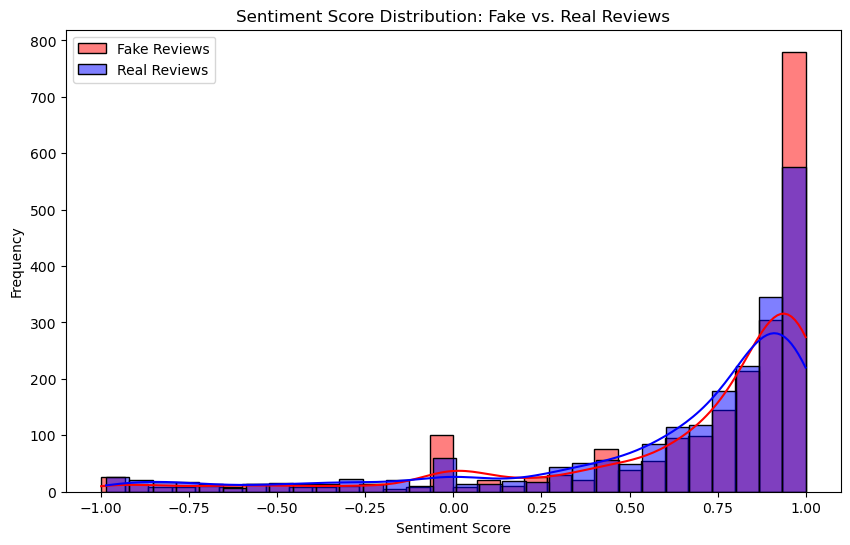

In [7]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the dataset with sentiment scores
file_path = "C:/Users/Juliana Hubacova/OneDrive - McGill University/Desktop/sentiment_analysis_reviews.csv"
df = pd.read_csv(file_path)

# Ensuring necessary columns exist
if 'sentiment_score' not in df.columns or 'label' not in df.columns:
    raise ValueError("Dataset must contain 'sentiment_score' and 'label' columns.")

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df[df['label'] == 'CG']['sentiment_score'], bins=30, kde=True, label="Fake Reviews", color='red')
sns.histplot(df[df['label'] == 'OR']['sentiment_score'], bins=30, kde=True, label="Real Reviews", color='blue')
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Sentiment Score Distribution: Fake vs. Real Reviews")
plt.legend()
plt.show()


### Classification Using Sentiment Score: Random Forest, KNN & SVM
In this section, we train and evaluate three classification models - Random Forest, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM) - to predict whether a review is fake or real based on its sentiment score.
*Naïve Bayes is not included because it requires non-negative integer features (e.g., word frequency) or TF-IDF features, making it unsuitable for direct sentiment score classification.*

1. **Label Encoding**: Converting categorical labels (`'OR'` for real reviews and `'CG'` for fake reviews) into numerical values (`0` and `1`).
2. **Feature Selection**: Using the *sentiment score* as the primary predictor.
3. **Train-Test Split**: Splitting the dataset into *80% training* and *20% testing* for model evaluation.
4. **Model Training**:
   - Random Forest: An ensemble learning method that builds multiple decision trees and combines their outputs.
   - K-Nearest Neighbors (KNN): A distance-based algorithm that classifies a sample based on the majority class of its nearest neighbors.
   - Support Vector Machine (SVM): A linear classifier that finds the optimal decision boundary to separate fake and real reviews.
5. **Evaluation**:
   - Accuracy, confusion matrix, and classification report are used to measure performance.

In [9]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# ---------------- Classification Using Sentiment Score ----------------

# Convert labels to numerical (Assuming 'real' = 0, 'fake' = 1)
df['label'] = df['label'].map({'OR': 0, 'CG': 1})

# Define features and target variable
X = df[['sentiment_score']]  # Features
y = df['label']  # Target variable

# Split into train-test sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------- Train a Random Forest Model ----------------
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

# ---------------- Train a KNN Model ----------------
knn_clf = KNeighborsClassifier(n_neighbors=5) 
knn_clf.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_clf.predict(X_test)

# --------------------- Train SVM Model ---------------------
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# ---------------- Evaluation Metrics ----------------
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)

# Evaluate each model
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("K-Nearest Neighbors", y_test, y_pred_knn)
evaluate_model("Support Vector Machine (SVM)", y_test, y_pred_svm)



Model: Random Forest
Accuracy: 0.55
Confusion Matrix:
 [[217 213]
 [178 266]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.50      0.53       430
           1       0.56      0.60      0.58       444

    accuracy                           0.55       874
   macro avg       0.55      0.55      0.55       874
weighted avg       0.55      0.55      0.55       874


Model: K-Nearest Neighbors
Accuracy: 0.55
Confusion Matrix:
 [[234 196]
 [194 250]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.54      0.55       430
           1       0.56      0.56      0.56       444

    accuracy                           0.55       874
   macro avg       0.55      0.55      0.55       874
weighted avg       0.55      0.55      0.55       874


Model: Support Vector Machine (SVM)
Accuracy: 0.51
Confusion Matrix:
 [[ 70 360]
 [ 64 380]]
Classification Report:
               pr

### Hyperparameter Tuning for Random Forest, KNN & SVM
We perform hyperparameter tuning using GridSearchCV for the three classification models:
- Random Forest
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)

The goal is to find the optimal combination of hyperparameters that maximizes classification accuracy for distinguishing fake vs. real reviews based on sentiment scores.

In [11]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------------- Hyperparameter Tuning for Random Forest ----------------
rf_param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42), 
    param_grid=rf_param_grid, 
    cv=5, 
    scoring='accuracy'
)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# ---------------- Hyperparameter Tuning for KNN ----------------
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}

knn_grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(), 
    param_grid=knn_param_grid, 
    cv=5, 
    scoring='accuracy'
)
knn_grid_search.fit(X_train, y_train)
best_knn_model = knn_grid_search.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

# ---------------- Hyperparameter Tuning for SVM ----------------
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(
    SVC(random_state=42),  
    param_grid_svm, 
    cv=5, 
    scoring='accuracy'
)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)  

# ---------------- Evaluation Metrics ----------------
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)

    print(f"\n Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)

# Evaluate the tuned models
evaluate_model("Tuned Random Forest", y_test, y_pred_rf)
evaluate_model("Tuned K-Nearest Neighbors", y_test, y_pred_knn)
evaluate_model("Tuned SVM", y_test, y_pred_svm)

# ---------------- Print Best Parameters ----------------
print("\n Best Parameters for Random Forest:", rf_grid_search.best_params_)
print(" Best Parameters for KNN:", knn_grid_search.best_params_)
print(" Best Parameters for SVM:", grid_svm.best_params_)



 Model: Tuned Random Forest
Accuracy: 0.57
Confusion Matrix:
 [[315 115]
 [265 179]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.73      0.62       430
           1       0.61      0.40      0.49       444

    accuracy                           0.57       874
   macro avg       0.58      0.57      0.55       874
weighted avg       0.58      0.57      0.55       874


 Model: Tuned K-Nearest Neighbors
Accuracy: 0.55
Confusion Matrix:
 [[228 202]
 [194 250]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.53      0.54       430
           1       0.55      0.56      0.56       444

    accuracy                           0.55       874
   macro avg       0.55      0.55      0.55       874
weighted avg       0.55      0.55      0.55       874


 Model: Tuned SVM
Accuracy: 0.56
Confusion Matrix:
 [[315 115]
 [269 175]]
Classification Report:
               precis

## Exploring Alternative Approaches Due to Low Sentiment-Based Accuracy

The sentiment-based classification model gave a relatively low accuracy, suggesting that sentiment alone may not provide enough information to distinguish between fake and real reviews. As a result, we decided to explore alternative text representation techniques. 

- **TF-IDF (Term Frequency-Inverse Document Frequency)**: This method highlights important words by reducing the weight of commonly occurring words. We will use both *unigrams* (single words treated as individual features) and *bigrams* (pairs of consecutive words to capture context).
- **Bag of Words (BoW)**: Unlike TF-IDF, BoW does not consider word importance but captures word frequency. We will include *unigrams and bigrams* for feature representation.

By applying these approaches, we want to capture more nuanced textual patterns and potentially improve the model's performance.


### Classification Using TF-IDF/BoW Features: Random Forest, KNN, Naïve Bayes & SVM
In this section, we follow the same classification steps as in sentiment score-based classification, but this time, we use TF-IDF vectorized text features and BoW instead of sentiment scores.

Unlike the previous approach, this version includes Naïve Bayes classifiers that are specifically designed for text data:

- **Multinomial Naive Bayes (MultinomialNB)**: This model uses **TF-IDF features**, which capture the relative importance of words by considering their frequency across the dataset.  
- **Bernoulli Naive Bayes (BernoulliNB)**: This model uses **Bag-of-Words (BoW) features**, where each word is represented as a binary indicator (present/absent)

We train and evaluate Random Forest, KNN, Naïve Bayes, and SVM, using accuracy, confusion matrix, and classification report to compare their effectiveness in detecting fake vs. real reviews.

In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import joblib

# Loading the dataset
file_path = "C:/Users/Juliana Hubacova/OneDrive - McGill University/Desktop/sentiment_analysis_reviews.csv"
df = pd.read_csv(file_path)

# Ensuring necessary columns exist
if 'processed_text' not in df.columns or 'label' not in df.columns:
    raise ValueError("Dataset must contain 'processed_text' and 'label' columns.")

# Drop rows with missing values
df = df.dropna(subset=['processed_text', 'label'])

# Convert labels to numerical (Assuming 'real' = 0, 'fake' = 1)
df['label'] = df['label'].map({'OR': 0, 'CG': 1})

# ---------------- Vectorization for Models ----------------
# TF-IDF for Multinomial Naïve Bayes, Random Forest, KNN, and SVM
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

# Binary Bag-of-Words (BoW) for Bernoulli Naïve Bayes
bow_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,2), binary=True)
X_bow = bow_vectorizer.fit_transform(df['processed_text'])

# Define the target variable
y = df['label']

# ---------------- Train-Test Splitting ----------------
# TF-IDF Feature Set (For MultinomialNB, RandomForest, KNN, and SVM)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Binary Bag-of-Words Feature Set (For BernoulliNB)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

# ---------------- Train a Random Forest Model ----------------
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_tfidf, y_train)
# Predictions
y_pred_rf = rf_clf.predict(X_test_tfidf)

# ---------------- Train a KNN Model ----------------
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_tfidf, y_train)
# Predictions
y_pred_knn = knn_clf.predict(X_test_tfidf)

# --------------------- Train Naïve Bayes Models ---------------------
# Train Multinomial Naïve Bayes (Using TF-IDF)
nb_multinomial = MultinomialNB()
nb_multinomial.fit(X_train_tfidf, y_train)
y_pred_nb_multi = nb_multinomial.predict(X_test_tfidf)

# Train Bernoulli Naïve Bayes (Using Binary BoW)
nb_bernoulli = BernoulliNB()
nb_bernoulli.fit(X_train_bow, y_train)
y_pred_nb_bernoulli = nb_bernoulli.predict(X_test_bow)

# --------------------- Train SVM Model ---------------------
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)
# Predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# --------------------- Evaluate Models ---------------------
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)

    print(f"\n Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)

# Evaluate each model
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("K-Nearest Neighbors", y_test, y_pred_knn)
evaluate_model("Multinomial Naïve Bayes", y_test, y_pred_nb_multi)
evaluate_model("Bernoulli Naïve Bayes", y_test, y_pred_nb_bernoulli)
evaluate_model("Support Vector Machine (SVM)", y_test, y_pred_svm)


 Model: Random Forest
Accuracy: 0.84
Confusion Matrix:
 [[367  63]
 [ 78 366]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       430
           1       0.85      0.82      0.84       444

    accuracy                           0.84       874
   macro avg       0.84      0.84      0.84       874
weighted avg       0.84      0.84      0.84       874


 Model: K-Nearest Neighbors
Accuracy: 0.73
Confusion Matrix:
 [[212 218]
 [ 20 424]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.49      0.64       430
           1       0.66      0.95      0.78       444

    accuracy                           0.73       874
   macro avg       0.79      0.72      0.71       874
weighted avg       0.79      0.73      0.71       874


 Model: Multinomial Naïve Bayes
Accuracy: 0.85
Confusion Matrix:
 [[376  54]
 [ 73 371]]
Classification Report:
               prec

### Hyperparameter Tuning for TF-IDF/BoW-Based Classification Models
We perform hyperparameter tuning using GridSearchCV for all classification models trained on TF-IDF vectorized/ BoW text features. This includes:
- Random Forest
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Multinomial Naïve Bayes
- Bernoulli Naïve Bayes

In [15]:
# Importing necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# --------------------- Hyperparameter Tuning ---------------------

# Grid Search for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train_tfidf, y_train)
best_rf = grid_rf.best_estimator_

# Grid Search for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_tfidf, y_train)
best_knn = grid_knn.best_estimator_

# Grid Search for Support Vector Machine (SVM)
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 'auto'] 
}
grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train_tfidf, y_train)
best_svm = grid_svm.best_estimator_

# Grid Search for Multinomial Naïve Bayes
param_grid_mnb = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
grid_mnb = GridSearchCV(MultinomialNB(), param_grid_mnb, cv=5, scoring='accuracy')
grid_mnb.fit(X_train_tfidf, y_train)
best_mnb = grid_mnb.best_estimator_

# Grid Search for Bernoulli Naïve Bayes
param_grid_bnb = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0], 
    'binarize': [0.0, 0.1, 0.5]  
}
grid_bnb = GridSearchCV(BernoulliNB(), param_grid_bnb, cv=5, scoring='accuracy')
grid_bnb.fit(X_train_bow, y_train)
best_bnb = grid_bnb.best_estimator_

# --------------------- Evaluate Best Models ---------------------
def evaluate_model(model_name, model, X_test, y_test):
    """Evaluates the model and prints metrics."""
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"\n Best Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)

# Evaluate tuned models
evaluate_model("Tuned Random Forest", best_rf, X_test_tfidf, y_test)
evaluate_model("Tuned K-Nearest Neighbors", best_knn, X_test_tfidf, y_test)
evaluate_model("Tuned SVM", best_svm, X_test_tfidf, y_test)
evaluate_model("Tuned Multinomial Naïve Bayes", best_mnb, X_test_tfidf, y_test)
evaluate_model("Tuned Bernoulli Naïve Bayes", best_bnb, X_test_bow, y_test)  

# --------------------- Print Best Hyperparameters ---------------------
print("\n Best Hyperparameters:")
print("Random Forest:", grid_rf.best_params_)
print("KNN:", grid_knn.best_params_)
print("SVM:", grid_svm.best_params_)
print("Multinomial Naïve Bayes:", grid_mnb.best_params_)
print("Bernoulli Naïve Bayes:", grid_bnb.best_params_)

# --------------------- Save Best Models ---------------------
joblib.dump(best_rf, "best_rf_model.pkl")
joblib.dump(best_knn, "best_knn_model.pkl")
joblib.dump(best_svm, "best_svm_model.pkl")
joblib.dump(best_mnb, "best_mnb_model.pkl")
joblib.dump(best_bnb, "best_bnb_model.pkl")
print("\n All models saved successfully.")



 Best Model: Tuned Random Forest
Accuracy: 0.84
Confusion Matrix:
 [[369  61]
 [ 80 364]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       430
           1       0.86      0.82      0.84       444

    accuracy                           0.84       874
   macro avg       0.84      0.84      0.84       874
weighted avg       0.84      0.84      0.84       874


 Best Model: Tuned K-Nearest Neighbors
Accuracy: 0.74
Confusion Matrix:
 [[230 200]
 [ 26 418]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.53      0.67       430
           1       0.68      0.94      0.79       444

    accuracy                           0.74       874
   macro avg       0.79      0.74      0.73       874
weighted avg       0.79      0.74      0.73       874


 Best Model: Tuned SVM
Accuracy: 0.90
Confusion Matrix:
 [[394  36]
 [ 54 390]]
Classification Report:
      

### Exploratory Data Analysis (EDA) for Goodreads Reviews Dataset
In this section, we conduct Exploratory Data Analysis (EDA) on the Goodreads reviews dataset to gain insights into review patterns, score distributions, and text characteristics.

Application Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  100000 non-null  object 
 1   Title               99999 non-null   object 
 2   Price               12982 non-null   float64
 3   User_id             80784 non-null   object 
 4   profileName         80780 non-null   object 
 5   review/helpfulness  100000 non-null  object 
 6   review/score        100000 non-null  float64
 7   review/time         100000 non-null  int64  
 8   review/summary      99982 non-null   object 
 9   review/text         100000 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB
None
              Price   review/score   review/time
count  12982.000000  100000.000000  1.000000e+05
mean      23.188951       4.204290  1.131459e+09
std       46.590832       1.217485  1.491246e+

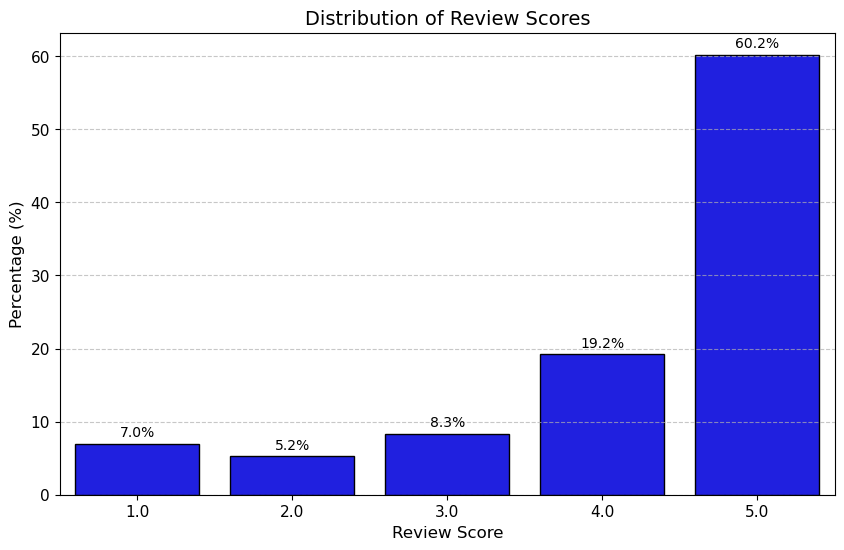

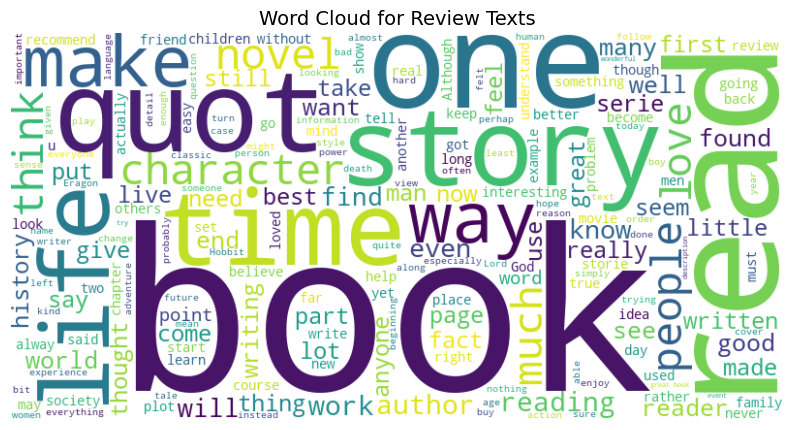

In [17]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Loading the dataset
application_data = pd.read_csv('C:/Users/Juliana Hubacova/OneDrive - McGill University/Desktop/first_100k_reviews.csv')

# Function to display missing values
def missing_values_table(df):
    missing_values = df.isnull().sum()
    missing_percentage = 100 * df.isnull().sum() / len(df)
    return pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Data Overview
print("Application Dataset Overview:")
print(application_data.info())
print(application_data.describe())

# Missing values
print("\nMissing Values in Application Dataset:")
print(missing_values_table(application_data))

# Distribution of Review Scores (as Percentage)
review_score_percentages = application_data['review/score'].value_counts(normalize=True).sort_index() * 100

# Bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=review_score_percentages.index, 
    y=review_score_percentages.values, 
    color='blue', 
    edgecolor='black'
)
plt.title("Distribution of Review Scores", fontsize=14)
plt.xlabel("Review Score", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top of each bar
for i, percentage in enumerate(review_score_percentages.values):
    ax.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=10)

plt.show()

# Word Cloud for Review Texts
text = " ".join(review for review in application_data['review/text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Review Texts", fontsize=14)
plt.show()

### Preprocessing of the Goodreads dataset
In this section, we apply the same cleaning and preprocessing steps used for the training dataset to the Goodreads reviews dataset. 


In [19]:
# Loading the dataset
goodread_df = pd.read_csv('C:/Users/Juliana Hubacova/OneDrive - McGill University/Desktop/first_100k_reviews.csv')

# List of columns to remove
columns_to_drop = ['Title', 'Price', 'User_id', 'profileName', 'review/helpfulness', 'review/time', 'review/summary']

# Drop the columns
goodread_df = goodread_df.drop(columns=columns_to_drop, errors='ignore')

# Rename the column 'review/text' to 'text_'
goodread_df = goodread_df.rename(columns={'review/text': 'text_'})

# Apply preprocessing to the text column
goodread_df['processed_text'] = goodread_df['text_'].apply(preprocess_text)

# Save the cleaned dataset
goodread_df.to_csv('C:/Users/Juliana Hubacova/OneDrive - McGill University/Desktop/first_100k_reviews_preprocessed.csv', index=False)

# Display the first few rows 
print(goodread_df.head())

           Id  review/score  \
0  1882931173           4.0   
1  0826414346           5.0   
2  0826414346           5.0   
3  0826414346           4.0   
4  0826414346           4.0   

                                               text_  \
0  This is only for Julie Strain fans. It's a col...   
1  I don't care much for Dr. Seuss but after read...   
2  If people become the books they read and if "t...   
3  Theodore Seuss Geisel (1904-1991), aka &quot;D...   
4  Philip Nel - Dr. Seuss: American IconThis is b...   

                                      processed_text  
0  julie strain fan collection photo page worth n...  
1  care much seuss reading philip nel book change...  
2  people become book read child father man seuss...  
3  theodore seuss geisel aka quot seuss quot one ...  
4  philip nel seuss american iconthis basically a...  


### Sentiment Score Calculation and Distribution Visualization

In this step, we compute the sentiment scores for the Goodreads dataset to visualize the distribution of sentiments across the reviews.

[nltk_data] Downloading package vader_lexicon to C:\Users\Juliana
[nltk_data]     Hubacova\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                      processed_text  sentiment_score
0  julie strain fan collection photo page worth n...           0.9081
1  care much seuss reading philip nel book change...           0.9796
2  people become book read child father man seuss...           0.9924
3  theodore seuss geisel aka quot seuss quot one ...           0.9524
4  philip nel seuss american iconthis basically a...           0.9749
Sentiment analysis complete. Saved as 'C:/Users/Juliana Hubacova/OneDrive - McGill University/Desktop/first_100k_sentiment_analysis_reviews.csv'.


C:\Users\Juliana Hubacova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


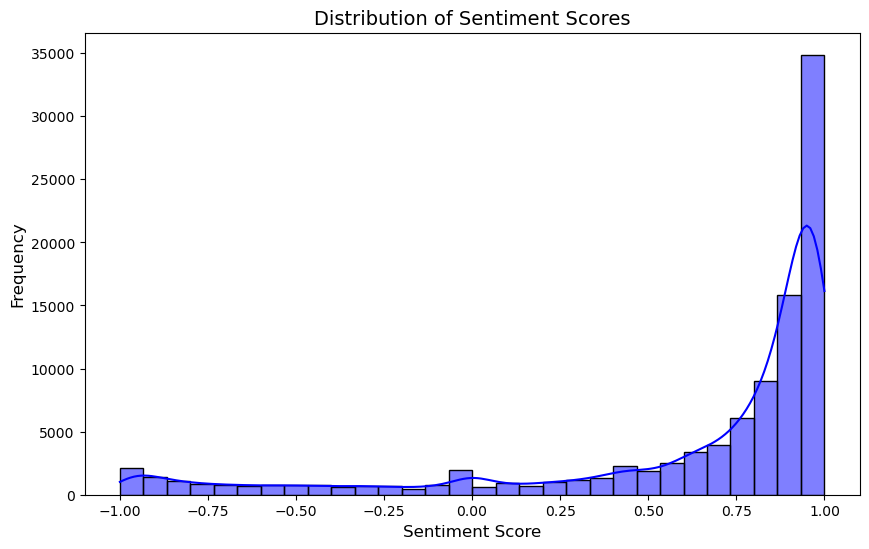

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download necessary resources
nltk.download('vader_lexicon')

# Load the preprocessed Goodreads dataset
goodread_df = pd.read_csv(r'C:/Users/Juliana Hubacova/OneDrive - McGill University/Desktop/first_100k_reviews_preprocessed.csv')

# Ensure the correct text column exists
text_column = 'processed_text'
if text_column not in goodread_df.columns:
    raise ValueError(f"Column '{text_column}' not found in the dataset.")

# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    if not isinstance(text, str) or text.strip() == '':
        return 0  # Neutral sentiment for empty text
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Apply sentiment analysis to dataset
goodread_df['sentiment_score'] = goodread_df[text_column].apply(get_sentiment)

# Save the sentiment results
sentiment_file = r"C:/Users/Juliana Hubacova/OneDrive - McGill University/Desktop/first_100k_sentiment_analysis_reviews.csv"
goodread_df.to_csv(sentiment_file, index=False)

# Display the first few rows with sentiment scores
print(goodread_df[['processed_text', 'sentiment_score']].head())
print(f"Sentiment analysis complete. Saved as '{sentiment_file}'.")

# Set the figure size and plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(goodread_df['sentiment_score'], bins=30, kde=True, color='blue')

# Add labels and title
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Sentiment Scores', fontsize=14)

# Show the plot
plt.show()


### Apply Best Model to Goodreads Dataset
We use our best-performing model, **SVM**, to classify the reviews as either real (OR) or fake (CG).

In [12]:
import joblib
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
goodread_df = pd.read_csv("C:/Users/Juliana Hubacova/OneDrive - McGill University/Desktop/first_100k_reviews_preprocessed.csv")

# Check if the column exists
if 'processed_text' not in goodread_df.columns:
    raise ValueError("Column 'processed_text' not found in the dataframe.")

# Drop rows with missing 'processed_text'
goodread_df = goodread_df.dropna(subset=['processed_text'])

# Initialize and apply TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
goodread_tfidf = tfidf_vectorizer.fit_transform(goodread_df['processed_text'])

# Load the saved best SVM model
best_svm = joblib.load("best_svm_model.pkl")

# Apply the trained SVM model to predict the new dataset
CG_OR_predictions = best_svm.predict(goodread_tfidf)

# Add predictions to the DataFrame
goodread_df['Predictions'] = CG_OR_predictions

# Save the new dataset with predictions
output_path = r"C:/Users/Juliana Hubacova/OneDrive - McGill University/Desktop/results.csv"
goodread_df.to_csv(output_path, index=False)

# Print the first few rows of the results
print(goodread_df[['processed_text', 'Predictions']].head())

print(f"SVM applied. Results saved as '{output_path}'")


                                      processed_text  Predictions
0  julie strain fan collection photo page worth n...            1
1  care much seuss reading philip nel book change...            0
2  people become book read child father man seuss...            0
3  theodore seuss geisel aka quot seuss quot one ...            0
4  philip nel seuss american iconthis basically a...            0
SVM applied. Results saved as 'C:/Users/Juliana Hubacova/OneDrive - McGill University/Desktop/results.csv'


*Results of the predictions*

In [14]:
# Load the results dataset
results_df = pd.read_csv("C:/Users/Juliana Hubacova/OneDrive - McGill University/Desktop/results.csv")

# Count occurrences of 0 and 1 in the Predictions column
counts = results_df['Predictions'].value_counts()

# Display results
print(counts)

Predictions
0    72751
1    27243
Name: count, dtype: int64


### Insights on the predictions

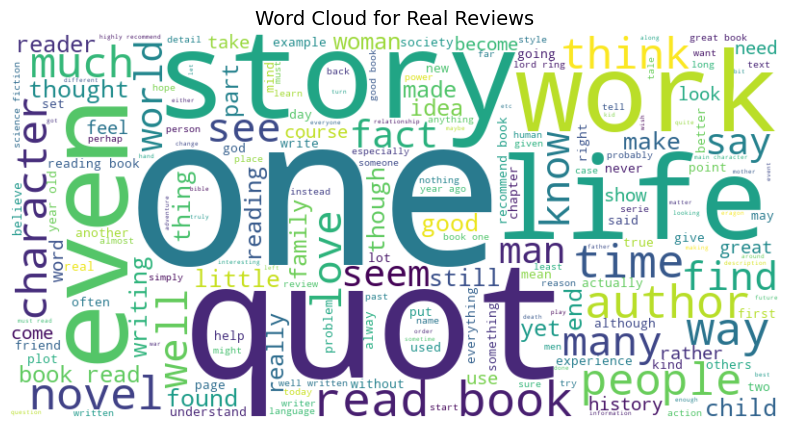

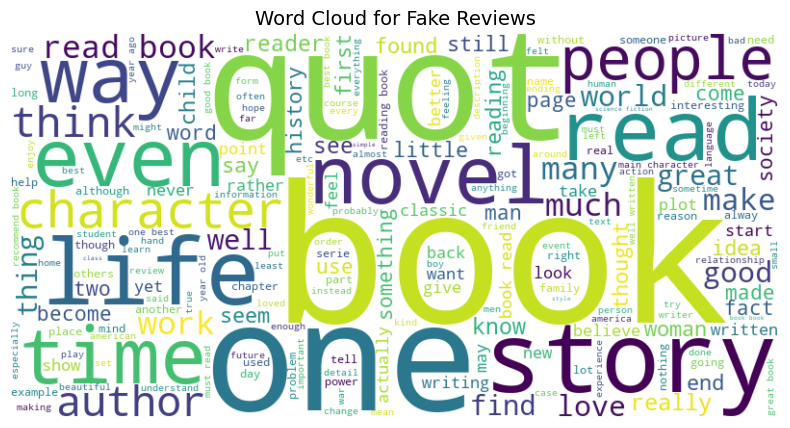

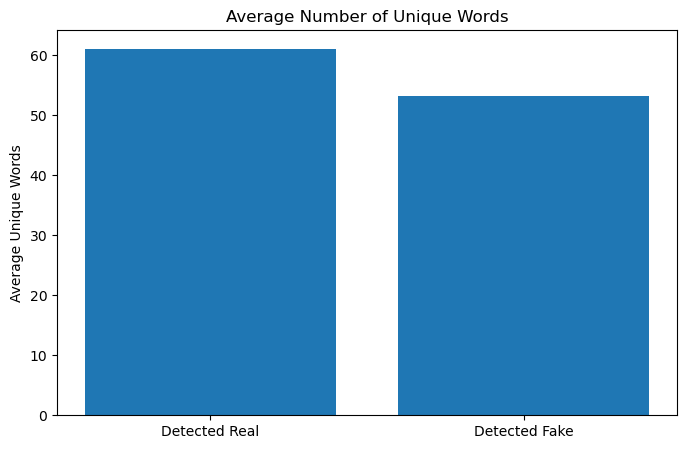

C:\Users\Juliana Hubacova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


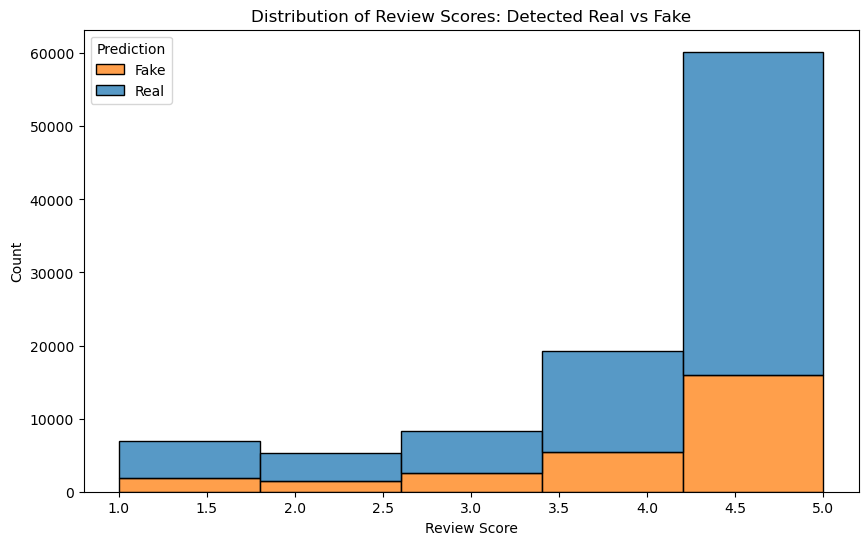

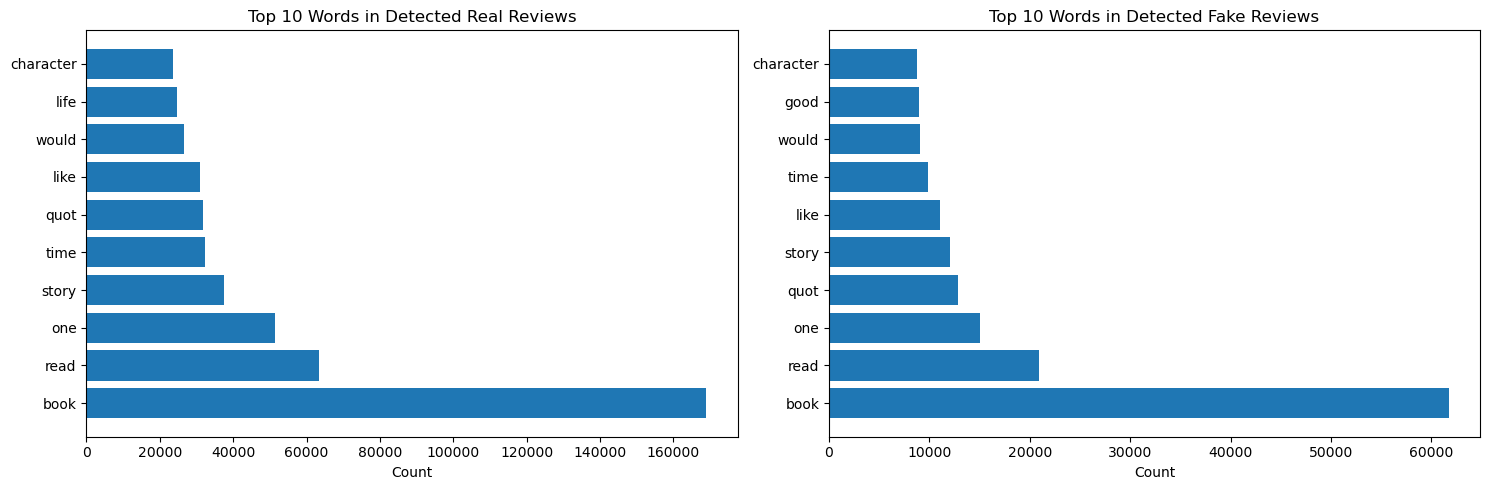

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Load the dataset
file_path = "C:/Users/Juliana Hubacova/OneDrive - McGill University/Desktop/results.csv"
df = pd.read_csv(file_path)

# Drop NaN values in processed_text column
df = df.dropna(subset=['processed_text'])

# Create word clouds for real and fake reviews
real_reviews_text = " ".join(df[df['Predictions'] == 0]['processed_text'])
fake_reviews_text = " ".join(df[df['Predictions'] == 1]['processed_text'])

# Function to generate and display word clouds
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

# Generate word clouds for real and fake reviews
create_wordcloud(real_reviews_text, "Word Cloud for Real Reviews")
create_wordcloud(fake_reviews_text, "Word Cloud for Fake Reviews")

# Average number of unique words
def count_unique_words(text):
    return len(set(text.split()))

df['unique_word_count'] = df['processed_text'].apply(count_unique_words)

avg_real = df[df['Predictions'] == 0]['unique_word_count'].mean()
avg_fake = df[df['Predictions'] == 1]['unique_word_count'].mean()

plt.figure(figsize=(8, 5))
plt.bar(['Detected Real', 'Detected Fake'], [avg_real, avg_fake])
plt.title('Average Number of Unique Words')
plt.ylabel('Average Unique Words')
plt.show()

# Distribution of review scores for detected real and fake reviews
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review/score', hue='Predictions', multiple='stack', bins=5)
plt.title('Distribution of Review Scores: Detected Real vs Fake')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.legend(title='Prediction', labels=[ 'Fake','Real'])
plt.show()

# Top 10 most common words in detected real and fake reviews
def get_top_words(text, n=10):
    words = text.split()
    return Counter(words).most_common(n)

real_top_words = get_top_words(real_reviews_text)
fake_top_words = get_top_words(fake_reviews_text)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.barh([word for word, count in real_top_words], [count for word, count in real_top_words])
ax1.set_title('Top 10 Words in Detected Real Reviews')
ax1.set_xlabel('Count')

ax2.barh([word for word, count in fake_top_words], [count for word, count in fake_top_words])
ax2.set_title('Top 10 Words in Detected Fake Reviews')
ax2.set_xlabel('Count')

plt.tight_layout()
plt.show()